# Demo of the need for the `plot_grouped_stackedbars()`
## Comparison with other techniques

There are already solutions to produce grouped stacked-bar graphs on [stackoverflow(https://stackoverflow.com/a/22845857) using seaborn. These have served as excellent inspirations for the present module. These techniques, however, have some major shortcomings. 

As noted by the contributor (@jrjc):
- the "light" shading is too pale if only two or three categories are needed. It makes color series (pale blue, blue, dark blue, etc.) difficult to distinguish.
- The legend is not produced to distinguish the meaning of the shadings ("pale" means what?)

**Most importantly**, though, the *author's code only works if the columns of the dataframe are sorted alphabetically.* Contrast the original code (with columns 'I', 'J', 'K', etc.) with the modified version with columns renamed 'zI', 'yJ', 'xK', etc.

## The original demo on stackoverflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

df1["Name"] = "df1"
df2["Name"] = "df2"
df3["Name"] = "df3"
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "index"]) # transform in tidy format each df
                   for i in [df1, df2, df3]],
                   ignore_index=True)

dfall.set_index(["Name", "index", "variable"], inplace=True)
dfall["vcs"] = dfall.groupby(level=["Name", "index"]).cumsum()
dfall.reset_index(inplace=True) 

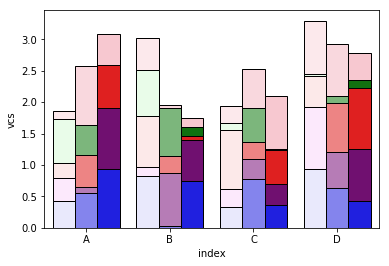

In [2]:
c = ["blue", "purple", "red", "green", "pink"]
for i, g in enumerate(dfall.groupby("variable")):
    ax = sns.barplot(data=g[1],
                     x="index",
                     y="vcs",
                     hue="Name",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
ax.legend_.remove() # remove the redundant legends 

## And now with columns renamed anti-aphabetically

In [3]:
# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["zI", "yJ", "xK", "wL", "vM"])  # <--- Note sole difference
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["zI", "yJ", "xK", "wL", "vM"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["zI", "yJ", "xK", "wL", "vM"])

df1["Name"] = "df1"
df2["Name"] = "df2"
df3["Name"] = "df3"
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "index"]) # transform in tidy format each df
                   for i in [df1, df2, df3]],
                   ignore_index=True)

dfall.set_index(["Name", "index", "variable"], inplace=True)
dfall["vcs"] = dfall.groupby(level=["Name", "index"]).cumsum()
dfall.reset_index(inplace=True) 

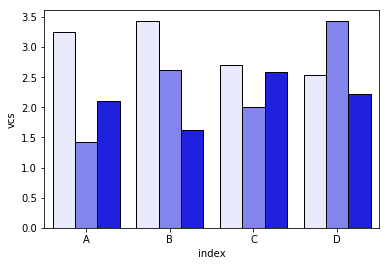

In [4]:
c = ["blue", "purple", "red", "green", "pink"]
for i, g in enumerate(dfall.groupby("variable")):
    ax = sns.barplot(data=g[1],
                     x="index",
                     y="vcs",
                     hue="Name",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
ax.legend_.remove() # remove the redundant legends 

### What went wrong?

Because the solution generates the illusion of "stacked bars" by putting smaller bars in front of larger bars, the order crucially matters, and the `groupby` statement in the code screws this up if the columns are not ordered alphabetically. It is quite obvious in the above example, but on less obvious inversions may go unnoticed, which could lead to misinterpretations.